# HOG + SVM

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import os
os.chdir("..")

from scripts.image_preprocessing import deskew
from scripts.feature_extraction import extract_hog_features

### Data Loading

In [2]:
df = pd.read_csv("dataset/digit_char_dataset.csv")

### Data Preprocessing

In [3]:
X = df.drop('class', axis=1)
y = df['class']

X = X.to_numpy()
X = X.reshape(X.shape[0], 28, 28).astype('uint8')

### Split dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Extraction

In [ ]:
X_train_hog = []
X_test_hog = []

for image in X_train:
    X_train_hog.append(extract_hog_features(deskew(image, (28, 28))))

for image in X_test:
    X_test_hog.append(extract_hog_features(deskew(image, (28, 28))))

## Label Encoding

In [7]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

### Model Training

In [8]:
clf = svm.SVC(C=10, kernel='rbf')
clf.fit(X_train_hog, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Model Evaluation

In [9]:
y_pred = clf.predict(X_test_hog)

report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

In [10]:
metrics = [{
    "Precision": round(report['weighted avg']['precision'], 3),
    "Recall": round(report['weighted avg']['recall'], 3),
    "F1-Score": round(report['weighted avg']['f1-score'], 3),
    "Accuracy": round(accuracy, 3),
}]

pd.DataFrame(metrics)

,Precision,Recall,F1-Score,Accuracy
0,0.982,0.982,0.981,0.982


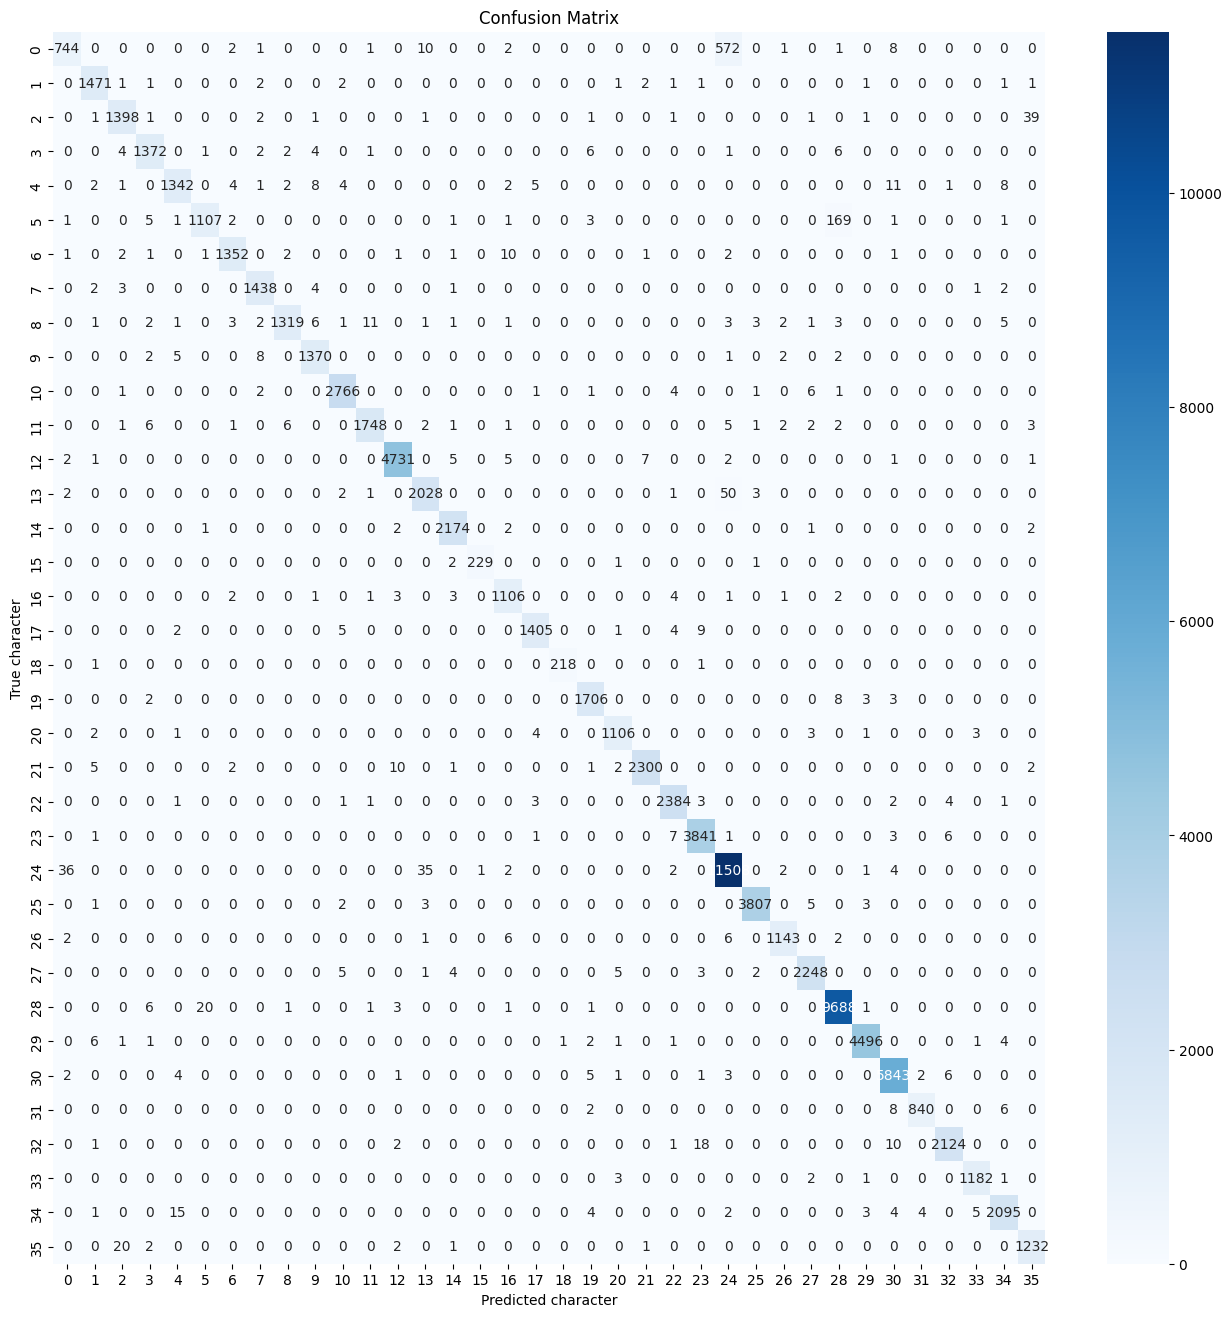

In [11]:
char = label_encoder.inverse_transform(np.unique(y_test))
plt.figure(figsize=(16,16))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=char, yticklabels=char)
plt.xlabel('Predicted character')
plt.ylabel('True character')
plt.title(f'Confusion Matrix')
plt.show()

### Save model

In [12]:
import pickle
with open('models/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
with open('models/hog_svm.pkl', 'wb') as f:
    pickle.dump(clf, f)